In [ ]:
# 特征工程:在搜集到的特征中找出最能影响预测稳定性的特征.特征工程是机器学习应用的最大束缚,是机器学习的重中之重.
# 表示学习:让算法在少量人为先验经验的情况下,能够自动从数据中,抽取合适的特征,完成原本需要通过特征工程才能得到的结果.
#     深度学习是通过多层非线性变换的组合方式,得到更抽象也更有效的特征表示.具体做法是将一系列相对简单的非线性映射操作构建成一个多层网络,每一层
#     都完成一次特征变换.以人脸识别为例,网络以像素为输入,低层学习边缘特征(线段),中层学习由边缘组成的局部图案,高层以学习局部图案到人脸的抽象.
    
# 深度:具有三个以上的隐层.即存在分级提取特征的能力.
    
# 深度学习为什么更倾向于增加隐层而非增加单层神经元的个数?:神经元数量相同的情况下,深层网络结构具有更大的容量,分层组合带来的是指数级的表达空间,能够
#     组合成更多不同类型的子结构,这样更容易学习和表示各种特征.并且,隐层增加则意味着由激活函数(activation function)带来的非线性变换的嵌套层数更多
#     就能构造更复杂的映射.
    
# 大数据和计算机性能的提升的重要保障,足够大的数据才能保证提供足够的特征.
# CPU是面向通用计算的产品,而GPU则是面向大规模浮点数并行计算的产品.GPU的内置核心虽然计算频率相对较低,但内置计算核心数量更多.

# 分层组合的表示方式更能准确描述我们所在世界的规则,自隐层结构提出以来,神经网络神经元的数量每2.4年翻一番.





In [ ]:
# tensorflow的优点:
#     具有灵活的表达能力,能够快速实现各种算法;
#     高执行性能,具备分布式扩展性;
#     跨平台可移植性;
#     实验可复现;
#     支持快速产品化,模型可随时部署.
# tensorflow:一个基于数据流图的数值计算开源库.数据流图是有向图,图中的点表示各种数学计算操作,边表示操作与操作之间传递的高维数组数据,称为tensor.
#     数据流图,也称计算图,计算图的执行可以看作数据tensor按照图的拓扑顺序,从输入节点逐步流过所有中间节点,最后流向输出节点的过程.

#计算图
    #tensorflow对有向图的概念进行了扩展,,加入了图的状态表示.对于神经网络等算法来说,有向图可以表示模型的结构,但图中边的权值参数并不是固定不变的,
    #而是通过训练过程不断调整的.所谓图的状态,就是图中所有参数的组合.tensorflow以variable来存储参数值,variable可以与tensor一样参数各种运算,
    #所不同的是,tensor的值在每次计算图执行完成之后立即被丢弃,而变量的值通过反向传播计算更新后会保留下来,代入下一次训练迭代.
#session会话
    #session是驱动tensorflow系统执行计算交互的入口.session负责完成多计算设备或集群分布式的节点布置和数据传输节点的添加,并负责将子图分配给相应
    #的执行器单元来运行.
    #从使用的角度来说,典型的用法是客户通过CreateSession接口与master建立连接,并在初始会话的过程中导入计算图.对于python接口,计算图可以在session
    #创建之前构造完成,并在tf.Session对象初始化时载入到后端执行引擎.Session还提供了Extend的接口,可以在会话中修改计算图.通过run接口来执行
    #Session管理运行时的一系列资源的申请和分配,所以在计算完成后,必须要关闭session来释放资源.

    
#     tensorflow采用前端编程语言与后端执行引擎分离,执行引擎又与面向硬件的计算分离的架构,充分实践了'高内聚,低耦合'的设计思想.
    
#     第三方:tensorboard,TFLearn
        
#     tensor代表多维数组,如,tensorflow中一般使用4维tensor表示一个mini-batch图片,四个维度分别是 [批大小,像素行数,像素列数,通道数],常用数据类型有
#     int32,int64,float32,float64,对于神经网络来说,单精度float32应该是最常用的数据类型.


In [ ]:
#系统架构
    #client-master-worker架构的分布式系统,在一般的执行流程中,client通过tf.Session接口与master进行通信,并向master提交触发执行的请求,master将
    #执行任务分配到一个或多个worker进行中,执行的结果通过master返回客户端.worker负责执行计算,每一个worker进程都会管理和使用计算机上的硬件设备.
    #计算设备device,每个CPU核或每块GPU都是一个计算设备,在系统中,每个计算设备都被分配了标识名称,该名称由三部分组成:worker所属任务名,计算设备的
    #类型,硬件在worker中的编号,如/job:localhost/device:cpu:0,/job:worker/task:17/device:gpu:3.
    
    #tensorflow将算子的定义和面向硬件的代码分离,可以单独开发所有算子在新设备上执行代码,并通过注册机制注入系统,即实现计算设备的扩展
    
    #在单机模式下,client,master,worker都在同一个进程中,worker会管理本机上所有的计算设备,在分布式环境下,client,master和worker之间会通过远程调用
    #的方式连接在一起,每个worker各自独立管理和执行计算设备.
    
    #在单机多设备模式下,为提高计算性能,tensorflow会将计算图分解成若干个子图,每个子图被分配到不同的设备上.这个分配由布置算法完成(palcement 
    #algorithm),基础布置算法会模拟计算图的执行,针对每一个算子节点,系统利用代价模型推算该操作在所有可用设备上的预计耗时,使用贪心算法选出耗时
    #最小的设备,在计算代价时,会考虑设备之间数据复制问题,数据在设备之间的复制传输往往会有比较 大的时间消耗.当计算图的算子被布置到不同设备上时,
    #系统会自动在跨设备的操作之间加入数据传输算子.系统会成对添加send和recv算子.此时每个设备实际只负责子图的执行,子图执行的结果tensor会通过
    #send/recv算子之间复制传输,添加通信节点的工作由系统自动2完成,是一种去中心化的组织方式,无需master在其中参与调度,这可以让系统的横向扩展性
    #得到提高.
    
    #在集群分布环境下,执行方式与单机类似,区别仅为节点通信是跨机器的网络通信,对于集群来说,最大的问题是容错机制.tensorflow有两种检测错误的机制,
    #一种是基于发送和接受算子之间传输的错误信息,另一种是master进程的轮询检查.当发现错误后,系统会终止当前迭代,从存档状态重新运行.
    
    
    

In [ ]:
#源码结构
    #tensorflow的系统实现采用了分层结构,核心是由C++语言实现的后端执行系统,前端则提供了基于多种语言的接口.
    
    #后端执行引擎:
        #系统框架framework,主要实现了tensorflow系统的基本运行方式,其中定义了计算图,tensor,算子等结构,还包括数据类型\资源管理器\消息通信机制等.
            #在算子的实现中,tensorflow使用了注册机制,在运行时按注册名称查找算子的实现.
        #计算图graph,主要实现了计算图模型的数据结构,包括节点node,边edge和图graph等类的定义,以及图的遍历算法和在布置节点所需的代价模型.
        #算子声明和内核实现ops/kernels,注册声明使用C++的宏REGISTER_OP,其中定义了算子的名称\输入输出\算子相关参数及文档说明.计算操作在硬件上的
            #具体代码实现被称作内核kernel,这个实现与计算平台相关,同样的计算操作在CPU和GPU上的运行代码是不同的.CPU计算基于Eigen库,GPU则基于CUDA
            #库.
        #前后端交互接口(protobuf)前后端交互接口使用protocol buffer协议定义.在源码目录中最主要的是master_serverice.proto和worker_service.proto,
            #分别声明了mater和worker服务的接口,即分布式架构.除服务API定义外,其它proto定义了各种必要的数据结构,如请求数据结构\响应数据结构\
            #GPUOptions和GraphOptions等配置的参数结构,还有用于存档模型的MetaGraphDef等.
        #运行时(common_runtime/distributed_runtime),负责管理程序执行所需的资源,其中包括对设备device的定义\内存分配BFC(best-fit with coalescing)
            #算法\计算图执行器和执行状态收集器\节点布置的simplepalcer算法的实现.主要实现了master和worker两个服务,以及执行调度器.
        #操作系统平台(platform目录),主要用于隔离不同的底层操作系统.
        #TFRecord数据的格式定义类Example(example),是在使用TFRecord格式数据时,必须用到的数据格式声明方法.
    
    #前端语言接口
        #tensorflow目前以经支持了C／Ｃ++,Python,Java,Go等多种前端语言,前端语言接口最主要的作用是利用宿主语言的优势对client进行封装,使得系统更
        #易用.以Python为例,在计算图的构建方面,使用了符号式编程(如,placeholder?)的定义方式,即在计算图的构建阶段,命令的执行并不会真正进行数学运算
        #而是仅完成计算节点的声明.python语言版本中,前后端使用swig(SWIG是个帮助使用C或者C++编写的软件能与其它各种高级编程语言进行嵌入联接的开
        #发工具)生产的代码相连接,GO语言则是实现了一个代码生成器,在编译期间生成所需要的代码.
    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import tensorflow as tf
import os



#数据预处理
data=pd.read_csv('C:\\Users\\hzg0601\\Downloads\\train.csv')
data.info()
data['Sex']=data['Sex'].apply(lambda s: 1 if s=='male' else 0)
data=data.fillna(0)
dataset_X=data[['Sex','Age','Pclass','SibSp','Parch','Fare']]
dataset_X=dataset_X.as_matrix()
data['Deceased']=data['Survived'].apply(lambda s: int(not s))
dataset_Y=data[['Deceased','Survived']]
dataset_Y=dataset_Y.as_matrix()

X_train,X_val,y_train,y_val=train_test_split(dataset_X,dataset_Y,test_size=0.2,random_state=42)

#将数据转为tfrecords
#将每条样本组装成protocol buffer定义的Example结构对象,序列化成字符串,再用tf.python_io.TFRecord写入文件.
def transform_to_tfrecord():
    tfrecord_file='train.tfrecords'
    def float_feature(value):
        return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))
    #把输入值转换成列表,把列表转换成tf.train.FloatList,取别名为float_list,把tf.train.FloatList转换成tf.train.Feature.
    def int64_feature(value):
        return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
    writer=tf.python_io.TFRecordWriter(tfrecord_file)
    for i in range(len(data)):
        features=tf.train.Features(feature={
            'Age':float_feature(data['Age'][i]),
            'Fare':float_feature(data['Fare'][i]),
            'Survived':int64_feature(data['Survived'][i]),
            'Pclass':int64_feature(data['Pclass'][i]),
            'Parch':int64_feature(data['Parch'][i]),
            'SibSp':int64_feature(data['SibSp'][i]),
            'Sex':int64_feature(1 if data['Sex'][i]=='male' else 0)
        })#组装
        example=tf.train.Example(features=features)#组装成protocol buffer定义的Example结构对象
        writer.write(example.SerializeToString())#序列化成字符串,并写入文件
    writer.close()
transform_to_tfrecord()

#TFRecordReader用于读取数据,它是一个算子,因此Tensorflow能够记住tfrecords文件读取的位置,并且始终能返回下一条记录

#tf.train.string_input_producer方法用于定义TFRecord文件作为模板结构的输入部分.该函数输入文件名列表在Session运行时产生的
#文件路径字符串循环队列.

In [ ]:

with tf.Graph().as_default() as g:
#更新默认图,否则merge_all命令至多只能生成一个event文件,每次运行必须删除上次的log文件夹
    
    
    #使用placeholder声明占位符

    #声明占位符placeholder需要给定三个参数,分别是输入数据的元素类型dtype,维度形状shape和占位符名称标识name,
    #数据类型包括int16,unit16,int32,unit32,float16,float32,string,
    #若不指定shape,默认为None,代表任意形状
    #通过mini-batch,批量训练是如今常用的优化技巧,通常能在更短时间内得到更好的拟合效果,所以在定义输入形状时,一般将第一个维度作为mini-batch,
    #而从第二个维度才是特征维度.
    with tf.name_scope('input'):
        X=tf.placeholder(tf.float32,shape=[None,6])
        y=tf.placeholder(tf.float32,shape=[None,2])



    #声明参数变量
    #以更新和存储参数值,方式为直接定义tf.Variable()
    #初始化变量对象有两种方法,一种是从protocol buffer结构VariableDef中反序列化,另一种是通过参数指定初始值,初始值必须是一个tensor对象
    #变量Variable的构造函数同样也没有作数据的初始化,而是在计算图中加入了一个variable算子和其对应的assign算子.
    with tf.name_scope('classifier'):#定义目录
        W=tf.Variable(tf.random_normal([6,2]),name='weights')
        b=tf.Variable(tf.zeros([2]),name='bias')
        saver=tf.train.Saver()
        #构造前向传播计算图
        #所谓前向传播就是网络正向计算,由输入计算出标签的过程
        y_pred=tf.nn.softmax(tf.matmul(X,W)+b)

        tf.summary.histogram('W',W)
        tf.summary.histogram('b',b)

    #声明代价函数
    #以互熵(cross entropy)作为代价函数
    #C=-(1/n)*sum(y*log(y')),y'为y的预测值
    #以下计算互熵的公式中加入了一个很小的误差值,防止log取-inf
    #通常解决-inf可能的方法有:直接加入一个极小的误差值;使用clip函数,当y_pred接近0时,将其赋值为极小误差值;当互熵计算出现nan时,显式地赋值cost为0
    with tf.name_scope('loss'):
        cross_entropy=-tf.reduce_sum(y*tf.log(y_pred+1e-10),reduction_indices=1)
        cost=tf.reduce_mean(cross_entropy)

        tf.summary.scalar('loss',cost)
    #加入优化算法
    #tensorflow内置了很多优化算法,如SGD,Momentum,Adagrad,ADAM,RMSprop,在线学习算法FTRL.优化器内部会自动构建梯度计算和反向传播部分的计算图.
    train_op=tf.train.GradientDescentOptimizer(0.001).minimize(cost)#0.001为学习率

    with tf.name_scope('accuracy'):
        correct_pred=tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
        acc_op=tf.reduce_mean(tf.cast(correct_pred,tf.float32))
        tf.summary.scalar('accuracy',acc_op)

    #构建训练迭代过程

    #前端编程语言要触发后端执行引擎,必须通过Session接口完成.
    #Session负责将运行环境打包,并且管理运行时需要处理的变量(variable)\队列(queues)\读取器(readers)
    #Session执行完以后必须关闭,可以用with关键字
    #启动session后就正式进入了训练过程,首先要做的是使用tf.global_variables_initializer().run()方法初始化所有变量
    #接下来就是用一个循环将训练数据反复代入计算图来执行迭代.Session.run()是触发后端执行的入口
    #Session.run()有两个关键参数,fetches和feed_dict,其中,fetches指定需要被计算的节点,可以用数组同时指定多个节点,节点可以是算子和tensor
        #计算所需要的输入数据则由feed_dict代入,feed_dict需要传入一个字典,字典的key是输入占位符placeholder,value为真实的输入数据

    with tf.Session(graph=g) as sess:

        tf.global_variables_initializer().run()

        writer=tf.summary.FileWriter('logs',sess.graph)
        merged=tf.summary.merge_all()#merge_all命令至多只能生成一个event文件,每次运行必须删除上次的log文件夹
    #登入tensorboard命令,tensorboard --logdir=C:/Users/hzg0601/log    
        for epoch in range(10):
            total_loss=0.
            for i in range(len(X_train)):
                feed={X:[X_train[i]],y:[y_train[i]]}
                _,loss=sess.run([train_op,cost],feed_dict=feed)#返回即计算的fetches,train_op不可省略

                total_loss+=loss
            summary,y_pr,accuracy=sess.run([merged,y_pred,acc_op],feed_dict={X:X_val,y:y_val})
            writer.add_summary(summary,epoch)
            print('Epoch:%04d,total loss=%.9f' %(epoch+1,total_loss))
        print('Training complete!')



        #在验证集上,评估模型的表现 


        y_pr,accuracy=sess.run([y_pred,acc_op],feed_dict={X:X_val,y:y_val})
        correct=np.equal(np.argmax(y_pr,1),np.argmax(y_val,1))
        accuracy_cu=np.mean(correct.astype(np.float32))

        print('Accuracy on validation set:%.9f--%.9f'%(accuracy,accuracy_cu))

        #writer.add_summary(accuracy,epoch)

        #存储和加载模型参数
        #得到一组优秀的参数时将其保存下来,预测时直接加载到模型中使用.
        #tf.train.Saver,Saver对象在初始化时,为计算图加入了用于存储和加载变量的算子,并可以通过参数指定要存储的变量.
        #save()和restore()是触发算子的入口.
        #Checkpoint是用于存储变量的二进制文件,在其内部使用字典结构存储变量,键为变量名,即Variable.name成员,值为变量的tensor值.
        #声明存储变量须在Saver之前.
        save_path=saver.save(sess,os.path.join(os.getcwd(),'model.ckpt'))#以绝对路径保存,global_step,创建checkpoint的step,添加到文件名中



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(dataset_X,dataset_Y,test_size=0.2,random_state=43)
#从存档的参数中读入上次训练的结果,并继续训练(或预测)
#一种方法是读入特定版本的checkpoint,另一种是利用名为checkpoint的文件读取
with tf.Session(graph=g) as sess2:#重载时必须指定计算图
    ckpt=tf.train.get_checkpoint_state('checkpoint')
    if ckpt and ckpt.model_checkpoint_path:
        
        saver.restore(sess2,ckpt.model_checkpoint_path)
#对带有特定版本的checkpoint的加载有两种方法,一种是直接指定名称前缀,加载一个特定版本的checkpoint,另一种是利用名为checkpoint的文件,找到最新
#版本的存档.        
    tf.global_variables_initializer().run()
    for epoch in range(10):
        total_loss=0.
        for i in range(len(X_train)):
            feed={X:[X_train[i]],y:[y_train[i]]}
            _,loss=sess2.run([train_op,cost],feed_dict=feed)#返回即计算的fetches
            total_loss+=loss
        print('Epoch:%04d,total loss=%.9f' %(epoch+1,total_loss))
    print('Training complete!')
    
    
    #在验证集上,评估模型的表现
    pred=sess2.run(y_pred,feed_dict={X:X_test})
    correct=np.equal(np.argmax(pred,1),np.argmax(y_test,1))
    accuracy=np.mean(correct.astype(np.float32))
    print('Accuracy on validation set:%.9f'%accuracy)
    #save_path=saver.save(sess,os.path.join(os.getcwd(),'model.ckpt'))
    

In [ ]:
#在测试集上进行验证
test=pd.read_csv('C:\\Users\\hzg0601\\Downloads\\test.csv')

#test=test.fillna(0)
mean_age=test['Age'].mean()
test['Age'][test.Age.isnull()]=mean_age
test['Sex']=test['Sex'].apply(lambda s:1 if s=='male' else 0)
test_x=test[['Sex','Age','Pclass','SibSp','Parch','Fare']]

with tf.Session(graph=g) as sess3:
    ckpt=tf.train.get_checkpoint_state('checkpoint')
    if ckpt and ckpt.model_checkpoint_path:
        saver.restore(sess3,ckpt.model_checkpoint_path)
    tf.global_variables_initializer().run()  #每次都要初始化 
    predictions=np.argmax(sess3.run(y_pred,feed_dict={X:test_x}),1)#
submission=pd.DataFrame({
    "PassengerId":test["PassengerId"],'Survived':predictions
})
submission.to_csv('titanic-submission.csv',index=False)
#submission

In [ ]:
#数据读取
    #tensorflow官方给出了三种数据加载方式:
    #1)用python代码供给
    #2)在构建计算图的开始部分,利用管道从文件中读取
    #3)预先加载数据,用常量或者变量将数据保持在内存中(仅适用于小数据)
    
    #对于1G以内的小数据
        #npy和npz(多个npy文件归档而成的文件)
        #pkl是python内置的数据序列化和饭序列化模块,通过该模块可以将python对象持久化为pkl文件.cPickle库比pickle快近1000倍
        #hdp,最新版本为HDF５，一种高效存储和分发科学数据的新型数据格式.
        
    #对于大数据,TFRecord文件.将每条样本组装成protocol buffer定义的Example结构对象,序列化成字符串,再由tf.python_io.TFRecordWriter写入文件.
    
    #TFRecordReader用于读取数据,它是一个算子,因此Tensorflow能够记住tfrecords文件读取的位置,并且始终能返回下一条记录

#tf.train.string_input_producer方法用于定义TFRecord文件作为模板结构的输入部分.该函数输入文件名列表在Session运行时产生的
#文件路径字符串循环队列.

#根据产生的文件名,TFRecordReader.read方法打开文件,再由tf.parse_single_example方法解析成一条可用的数据.
#tf.train.shuffle_batch可以设置内存读取样本上限与上限训练batch批次的大小等参数,用于定义产生随机生成的batch训练数据包.在Session的运行中,
#tf.train.shuffle_batch函数生成batch数据包的过程是作为线程独立运行的.数据输入线程的挂起和运行时机由batch数据的生成函数控制
#start_queue_runners开启对应运行会话Session的所有线程队列并返回线程句柄.Coordinator类对象负责实现数据输入线程的同步.
#当string_input_producer函数产生无限循环队列时,应取消数据输入与训练程序的线程同步.
   

In [ ]:
import tensorflow as tf
def read_and_decode(train_files,num_threads=2,num_epochs=100,batch_size=10,min_after_dequeue=10):
    #读取文件
    reader=tf.TFRecordReader()
    #定义TFRecordReader实例
    #不同reader对应不同的文件结构，比如度bin文件tf.FixedLengthRecordReader就比较好，因为每次读等长的一段数据。
    #如果要读什么别的结构也有相应的reader。
    
    filename_queue=tf.train.string_input_producer(train_files,num_epochs=num_epochs)
    
    #产生一个文件名队列,若num_epochs不为0,则需以local_variable进行初始化
    #只是创建队列,但不真正将文件名加入队列,如果此时开始计算,因为内存对列中什么也没有,计算单元会一直等待,导致系统被阻塞
    #为此需要tf.train.start_queue_runners启动填充队列的线程
    #num_epochs,从string_tensor中产生每个字符num_epochs次,即每个文件数据被计算的次数,而后返回OutOfRange错误
    #shuffle参数,指定epoch顺序是否被打乱,默认为True
    #当string_input_producer函数产生无限循环队列时,应取消数据输入与训练程序的线程同步.
    
    _,serialized_example=reader.read(filename_queue)
    #返回键值对
    #read方法，这个方法需要一个IO类型的参数，就是我们上边string_input_producer输出的那个queue了，
    #reader从这个queue中取一个文件目录，然后打开它经行一次读取，reader的返回是一个tensor
    #（这一点很重要，我们现在写的这些读取代码并不是真的在读数据，还是在画graph，和定义神经网络是一样的，
    #这时候的操作在run之前都不会执行，这个返回的tensor也没有值，他仅仅代表graph中的一个结点）。
    
    #解析单个example原型,输入参数为:标量字符张量,字典(特征键到FixedLenFeature/VarLenFeature的映射),name=None,example_name=None
    featuredict=tf.parse_single_example(
        serialized_example,features={
            'Age':tf.FixedLenFeature([],tf.float32),
            'Fare':tf.FixedLenFeature([],tf.float32),
            'Survived':tf.FixedLenFeature([],tf.int64),
            'Pclass':tf.FixedLenFeature([],tf.int64),
            'Parch':tf.FixedLenFeature([],tf.int64),
            'SibSp':tf.FixedLenFeature([],tf.int64),
            'Sex':tf.FixedLenFeature([],tf.int64)
    } )
    #解码文件,并转换为float32
    
    labels=featuredict.pop('Survived')#删除并返回Survived对应的键值
    features=[tf.cast(value,tf.float32) for value in featuredict.values()]#将tensor转换成float32位
    
    #进行shuffle并返回
    #tensor代表的是单个样本tensor（[高h,宽w,管道channel]），但是训练网络的时候的输入一般都是批batch样本（[样本数batch,高h,宽w,管道c]），
    #我们就要用tf.train.batch或者tf.train.shuffle_batch这个函数把一个一个小样本的tensor打包成一个样本batch，
    #这些函数的输入是单个样本tensor，输出就是4维的样本batch，其内部原理似乎是创建了一个queue，然后不断调用你的单样本tensor获得样本，
    #直到queue里边有足够的样本，然后一次返回一堆样本，组成样本batch。
    features,labels=tf.train.shuffle_batch(
    [features,labels],batch_size=batch_size,num_threads=num_threads,capacity=min_after_dequeue+3*batch_size,
    min_after_dequeue=min_after_dequeue)
    #tensor列表或字典;批大小;线程数;capacity是队列的长度
    #min_after_dequeue是出队后，队列至少剩下min_after_dequeue个数据
    return features,labels


def train_with_queuerunner():
    x,y=read_and_decode(['train.tfrecords'])
    
    with tf.Session() as sess:
        tf.group(tf.global_variables_initializer(),tf.local_variables_initializer()).run()
        coord=tf.train.Coordinator()
        #.Coordinator类对象负责实现数据输入线程的同步
        #当string_input_producer函数产生无限循环队列时,应取消数据输入与训练程序的线程同步.
        
        threads=tf.train.start_queue_runners(sess=sess,coord=coord)
        #start_queue_runners开启对应运行会话Session的所有线程队列并返回线程句柄
        #tf.train.start_queue_runners(sess=None, coord=None, daemon=True, start=True, collection='queue_runners')
        try:
            step=0
            while not coord.should_stop():#891个样本*100epoch/10batch_size
                fetures,labels=sess.run([x,y])#必须成套读取,否则会导致feature与label对应不上
                if step%100==0:
                    print('step %d'% step,labels)
                step+=1
        except tf.errors.OutOfRangeError:
            print('Done training -- epoch limit reached')
        finally:
            coord.request_stop()
        coord.join(threads)
train_with_queuerunner()
    

In [ ]:
tf.train.string_input_producer?

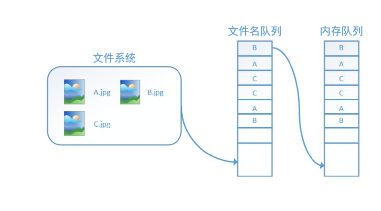

In [21]:
from matplotlib import pyplot as plt
from matplotlib import image as img
p1=img.imread('C:\\Users\\hzg0601\\Pictures\\tf_queue.png')
plt.imshow(p1)
plt.axis('off')
plt.show()
#tensorflow用文件名队列+内存队列的形式读入文件,文件名队列用于读取数据\组织顺序\确定规模 以备内存队列读取,内存队列读取数据用于计算
#假定我们要跑一个epoch,那么tensorflow就会把数据放入文件名队列(enqueue),并在之后标柱队列结束,
#程序运行后,内存队列首先读入第一个数据(此时该数据出列dequeue),而后剩余数据依次出列,当所有数据读取完毕,就会抛出OutOfRange异常.
#

In [ ]:
tf.train.start_queue_runners?

In [ ]:
#tensorflow仿照sklearn设计的高级API

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import tensorflow as tf
import os



#数据预处理
data=pd.read_csv('C:\\Users\\hzg0601\\Downloads\\train.csv')

data['Sex']=data['Sex'].apply(lambda s: 1 if s=='male' else 0)
data=data.fillna(0)
dataset_X=data[['Sex','Age','Pclass','SibSp','Parch','Fare']]
dataset_X=dataset_X.as_matrix()

dataset_Y=data['Survived']
dataset_Y=dataset_Y.as_matrix()


data['Age']=tf.cast(data['Age'],dtype=tf.float32)
data['Fare']=tf.cast(data['Fare'],dtype=tf.float32)
data.info()
X_train,X_val,y_train,y_val=train_test_split(dataset_X,dataset_Y,test_size=0.2,random_state=42)


import tensorflow.contrib.learn as skflow
from sklearn import metrics

feature_cols=skflow.infer_real_valued_columns_from_input(X_train)
classifier=skflow.LinearClassifier(feature_columns=feature_cols,n_classes=2)
classifier.fit(X_train,y_train,steps=200)
#print(list(classifier.predict(X_val)))
accuracy=metrics.accuracy_score(y_val,list(classifier.predict(X_val)))#classifier产生genterator类型,需转换成list
print('accuracy:%f'%accuracy)

In [24]:
#tflearn,tensorflow的高级封装

import numpy as np
import pandas as pd
import tensorflow as tf
import tflearn 
import os

tf.reset_default_graph()#********************否则报list index out of range 错误,加载了不能读入存档

data=pd.read_csv('C:\\Users\\hzg0601\\Downloads\\train.csv')
#data.info()
data['Sex']=data['Sex'].apply(lambda s: 1 if s=='male' else 0)
data=data.fillna(0)
dataset_X=pd.DataFrame(data[['Sex','Age','Pclass','SibSp','Parch','Fare']])
data_X=data[['Sex','Age','Pclass','SibSp','Parch','Fare']].as_matrix()

data['Deceased']=data['Survived'].apply(lambda s: int(not s))
dataset_Y=pd.DataFrame(data[['Survived','Deceased']])
data_Y=data[['Deceased','Survived']].as_matrix()



#tf.app.flags.DEFINE_integer('epochs',10,'Training epochs')

#创建存档目录
ckpt_dir='./ckpt_dir'
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)
    
#定义分类模型
n_features=dataset_X.shape[1]
network=tflearn.input_data([None,n_features])

y_pred=tflearn.fully_connected(network,2,activation='softmax')#2层网络
net=tflearn.regression(y_pred)
model=tflearn.DNN(net)



Training Step: 129  | total loss: 0.61495 | time: 0.044s
| Adam | epoch: 010 | loss: 0.61495 -- iter: 768/801
Training Step: 130  | total loss: 0.61215 | time: 1.053s
| Adam | epoch: 010 | loss: 0.61215 | val_loss: 0.57443 -- iter: 801/801
--
INFO:tensorflow:C:\Users\hzg0601\ckpt_dir\modeltitanic.ckpt is not in all_model_checkpoint_paths. Manually adding it.
Accuracy on train set: 0.690235693


In [27]:
#读取模型存档
ckpt=os.path.join(ckpt_dir,'modeltitanic.ckpt')
if os.path.isfile(ckpt):
    model.load(ckpt)
#训练
model.fit(data_X,data_Y,validation_set=0.1,n_epoch=10)
#存储模型参数
model.save(ckpt)
#查看模型在训练集上的准确率
metric=model.evaluate(data_X,data_Y)
print('Accuracy on train set: %.9f'%metric[0])


Training Step: 519  | total loss: 0.58321 | time: 0.038s
| Adam | epoch: 040 | loss: 0.58321 -- iter: 768/801
Training Step: 520  | total loss: 0.57672 | time: 1.050s
| Adam | epoch: 040 | loss: 0.57672 | val_loss: 0.50648 -- iter: 801/801
--
INFO:tensorflow:C:\Users\hzg0601\ckpt_dir\modeltitanic.ckpt is not in all_model_checkpoint_paths. Manually adding it.
Accuracy on train set: 0.709315375


In [ ]:
#读取测试数据,并进行预测
test=pd.read_csv('C:\\Users\\hzg0601\\Downloads\\test.csv')

#test=test.fillna(0)
mean_age=test['Age'].mean()
test['Age'][test.Age.isnull()]=mean_age
test['Sex']=test['Sex'].apply(lambda s:1 if s=='male' else 0)
test_x=test[['Sex','Age','Pclass','SibSp','Parch','Fare']].as_matrix()

predictions=np.argmax(model.predict(test_x),1)
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})
submission.to_csv('titanic-submission.csv',index=False)

In [28]:
import numpy as np
import tflearn
import tensorflow as tf
import pandas as pd
import os 
tf.reset_default_graph()

In [ ]:


from tflearn.datasets import titanic
titanic.download_dataset('titanic_dataset.csv')



In [29]:

dataall=pd.read_csv('titanic_dataset.csv',na_filter =True)
dataall=dataall.fillna(0)
dataall['sex']=dataall['sex'].apply(lambda v: 1 if v=='male' else 0)
data=dataall[['pclass','sex','age','sibsp','parch','fare']].as_matrix()

dataall['deceased']=dataall['survived'].apply(lambda s: int(not s))

labels=dataall[['survived','deceased']].as_matrix()

net=tflearn.input_data(shape=[None,data.shape[1]])
net=tflearn.fully_connected(net,32)
net=tflearn.fully_connected(net,32)
net=tflearn.fully_connected(net,2,activation='softmax')
net=tflearn.regression(net)
model=tflearn.DNN(net)





In [33]:
ckpt=os.path.join(os.getcwd(),'modeltitanic.ckpt')
if os.path.isfile(ckpt):
    model.load(ckpt)
    
model.fit(data,labels,n_epoch=10,batch_size=16,validation_set=0.2)

metric=model.evaluate(data,labels)

print('Accuracy on train set: %.9f'%metric[0])

Training Step: 1979  | total loss: 0.50237 | time: 0.182s
| Adam | epoch: 030 | loss: 0.50237 -- iter: 1040/1047
Training Step: 1980  | total loss: 0.51110 | time: 1.190s
| Adam | epoch: 030 | loss: 0.51110 | val_loss: 0.45894 -- iter: 1047/1047
--
Accuracy on train set: 0.784568373


In [14]:
tflearn.layers.fully_connected?
# tflearn.layers.fully_connected(incoming, n_units, activation='linear', bias=True, weights_init='truncated_normal',
#                                bias_init='zeros',
#                                regularizer=None, weight_decay=0.001, trainable=True, restore=True, reuse=False, 
#                                scope=None, name='FullyConnected')

[0.7929717346490841]